# In this notebook, we plot the annual-mean submesoscale potential vorticity fluxes at the surface.

The model outputs with the surface forcing conditions saved were only available between December 17, 2009 and October 29, 2010 so we approximate this duration as the annual representation.

In [1]:
from dask.distributed import Client, LocalCluster

cluster = LocalCluster()
cluster.scale(6)

client = Client(cluster)
client

/scratch/cnt0024/hmg2840/tuchida/condapack/lib/python3.7/site-packages/distributed/dashboard/core.py:72: UserWarning: 
Failed to start diagnostics server on port 8787. [Errno 13] Permission denied
  warnings.warn("\n" + msg)


Client Scheduler: tcp://127.0.0.1:35548 Dashboard: http://127.0.0.1:40054/status,Cluster Workers: 6 Cores: 42 Memory: 202.64 GB


In [2]:
import xarray as xr
import numpy as np
import os.path as op
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import cartopy
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.ticker as mticker
cartopy.config['pre_existing_data_dir']  = '/scratch/cnt0024/hmg2840/albert7a/DEV/git/cartopy_data'

In [4]:
ddir = '/store/CT1/hmg2840/lbrodeau/eNATL60/eNATL60-BLBT02-S/'
xtra = '/store/CT1/hmg2840/lbrodeau/eNATL60/eNATL60-BLBT02X-S'
scratch = '/scratch/cnt0024/hmg2840/tuchida/temp'

In [5]:
ys,ye,xs,xe = (1400,2800,950,2550)
g = 9.81
cp = 4e3
cs = 1.2
# zchunk = 10
xchunk = -1
ychunk = -1
tchunk = 1

dsmask = xr.open_dataset(op.join(ddir,'../eNATL60-I/mesh_mask_eNATL60_3.6.nc'), 
                         chunks={'y':ychunk,'x':xchunk}
                        ).isel(y=slice(ys+1,ye-1),x=slice(xs+1,xe-1)).isel(z=0,t=0)

In [7]:
dsJ = xr.open_mfdataset(op.join(scratch,'GulfStream/Jflux_*.nc'),
                        chunks={'time_counter':tchunk}, combine='by_coords')
dsJ

<xarray.Dataset>
Dimensions:       (time_counter: 7608, x: 1598, y: 1398)
Coordinates:
    nav_lon       (y, x) float32 dask.array<chunksize=(1398, 1598), meta=np.ndarray>
    nav_lat       (y, x) float32 dask.array<chunksize=(1398, 1598), meta=np.ndarray>
    deptht        float32 0.48045477
  * time_counter  (time_counter) datetime64[ns] 2009-12-17T00:30:00 ... 2010-10-29T23:30:00
Dimensions without coordinates: x, y
Data variables:
    J_D           (time_counter, y, x) float64 dask.array<chunksize=(1, 1398, 1598), meta=np.ndarray>
    J_TTW         (time_counter, y, x) float64 dask.array<chunksize=(1, 1398, 1598), meta=np.ndarray>
    J_wind        (time_counter, y, x) float64 dask.array<chunksize=(1, 1398, 1598), meta=np.ndarray>

distributed.comm.tcp - WARNING - Closing dangling stream in <TCP  local=tcp://127.0.0.1:40714 remote=tcp://127.0.0.1:35548>


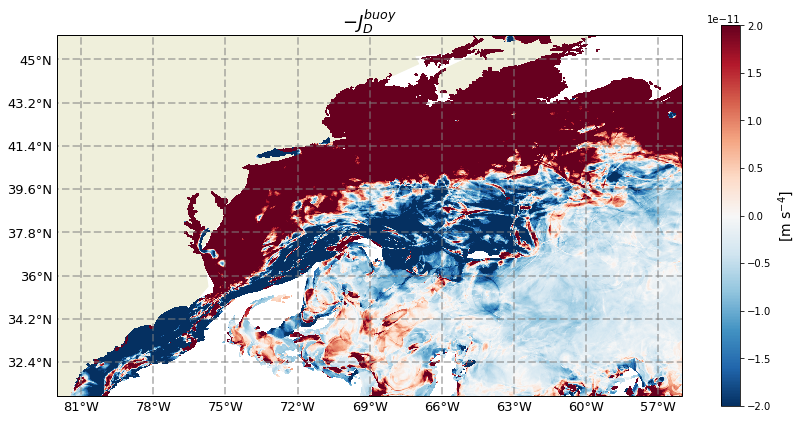

In [8]:
fig = plt.figure(figsize=(14,10))
ax = fig.add_subplot(projection=ccrs.PlateCarree())
ax.set_extent([-82,-56,31,46], crs=ccrs.PlateCarree())

im = ax.pcolor(dsmask.nav_lon, dsmask.nav_lat, 
               -dsJ.J_D.mean('time_counter',skipna=True).where(dsmask.tmask!=0.),
               cmap='RdBu_r', vmin=-2e-11, vmax=2e-11, rasterized=True, 
               transform=ccrs.PlateCarree())


ax.add_feature(cfeature.LAND)

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 13, 'color': 'k'}
gl.ylabel_style = {'size': 13, 'color': 'k'}

ax.set_xlabel(r"Longitude", fontsize=16)
ax.set_ylabel(r"Latitude", fontsize=16)
ax.set_title(r"$-J_D^{buoy}$", fontsize=18)
cbar = fig.colorbar(im, shrink=.7)
cbar.set_label(r"[m s$^{-4}$]", fontsize=14)
plt.savefig(r"/scratch/cnt0024/hmg2840/tuchida/Figs/Jd_12-17-2009_10-29-2010_GulfStream.pdf")

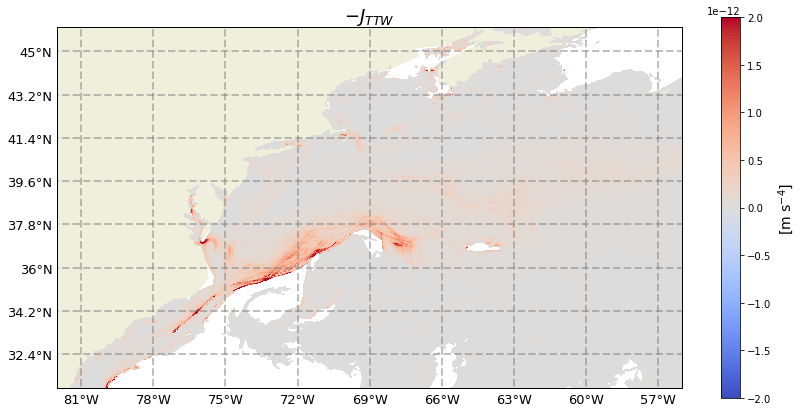

In [9]:
fig = plt.figure(figsize=(14,10))
ax = fig.add_subplot(projection=ccrs.PlateCarree())
ax.set_extent([-82,-56,31,46], crs=ccrs.PlateCarree())

im = ax.pcolor(dsmask.nav_lon, dsmask.nav_lat, 
               -dsJ.J_TTW.mean('time_counter',skipna=True).where(dsmask.tmask!=0.),
               cmap='coolwarm', vmin=-.2e-11, vmax=.2e-11, rasterized=True, 
               transform=ccrs.PlateCarree())


ax.add_feature(cfeature.LAND)

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 13, 'color': 'k'}
gl.ylabel_style = {'size': 13, 'color': 'k'}

ax.set_xlabel(r"Longitude", fontsize=16)
ax.set_ylabel(r"Latitude", fontsize=16)
ax.set_title(r"$-J_{TTW}$", fontsize=18)
cbar = fig.colorbar(im, shrink=.7)
cbar.set_label(r"[m s$^{-4}$]", fontsize=14)
plt.savefig(r"/scratch/cnt0024/hmg2840/tuchida/Figs/Jttw_12-17-2009_10-29-2010_GulfStream.pdf")

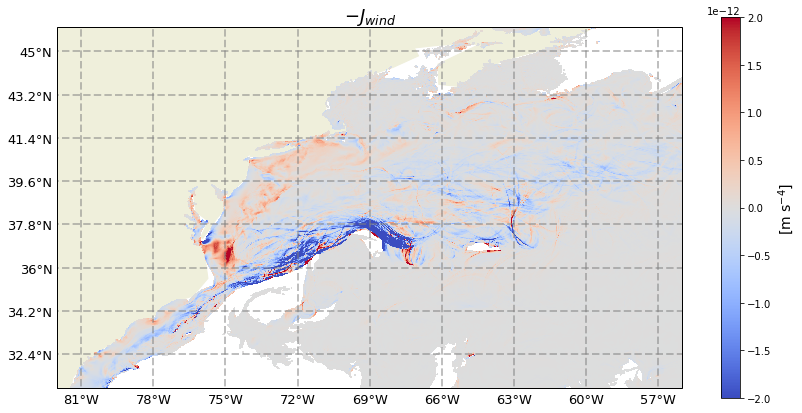

In [10]:
fig = plt.figure(figsize=(14,10))
ax = fig.add_subplot(projection=ccrs.PlateCarree())
ax.set_extent([-82,-56,31,46], crs=ccrs.PlateCarree())

im = ax.pcolor(dsmask.nav_lon, dsmask.nav_lat, 
               -dsJ.J_wind.mean('time_counter',skipna=True).where(dsmask.tmask!=0.),
               cmap='coolwarm', vmin=-.2e-11, vmax=.2e-11, rasterized=True, 
               transform=ccrs.PlateCarree())


ax.add_feature(cfeature.LAND)

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 13, 'color': 'k'}
gl.ylabel_style = {'size': 13, 'color': 'k'}

ax.set_xlabel(r"Longitude", fontsize=16)
ax.set_ylabel(r"Latitude", fontsize=16)
ax.set_title(r"$-J_{wind}$", fontsize=18)
cbar = fig.colorbar(im, shrink=.7)
cbar.set_label(r"[m s$^{-4}$]", fontsize=14)
plt.savefig(r"/scratch/cnt0024/hmg2840/tuchida/Figs/Jwind_12-17-2009_10-29-2010_GulfStream.pdf")

### Based on the diagnosed submesoscale potential vorticity fluxes, it seems that surface buoyancy forcing ($J^\text{buoy}_\text{D}$) is more dominant in our simulation compared to the simulation presented by [Wenegrat et al. (2018, their Fig. 12)](https://journals.ametsoc.org/doi/full/10.1175/JPO-D-17-0219.1) where they found all terms to be on the order of $O(10^{-11})$. (Notice the difference in the colorbars.) The discrepancies could be due to different surface forcing conditions, spatial resolution and/or isotropic turbulent mixing parametrization schemes used between the two simulations.